In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [53]:
t_data  = pd.read_csv('data/train.csv')
p_data = pd.read_csv('data/predict.csv')

In [3]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [64]:
t_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [101]:

pd.DataFrame(t_data.pivot_table(columns='cut').loc['price']).sort_values(by='price')

,price
cut,
Ideal,3468.376238
Good,3908.122017
Very Good,4022.849668
Fair,4329.093157
Premium,4634.091561


Here the classification is unclear... intuitively it would seeam that the classification would be Ideal, Good, Very Good, Fair and premium

In [115]:
# Cheapest diamonds categorical

pd.DataFrame(t_data.pivot_table(columns=['color']).loc['price']).sort_values(by='price')

,price
color,
E,3084.501236
D,3183.360730
F,3708.511043
G,4052.926910
H,4526.646216
I,5119.925691
J,5352.707028


Color is clearly an ordinal variable with relationship with price

In [117]:
pd.DataFrame(t_data.pivot_table(columns=['clarity']).loc['price']).sort_values(by='price')

,price
clarity,
VVS1,2563.981798
IF,2863.822861
VVS2,3309.624638
VS1,3856.880832
I1,3872.684303
VS2,3962.256363
SI1,4002.738471
SI2,5085.706744


In [124]:
ord_enc = OrdinalEncoder()
t_encoded = t_data
t_encoded['clarity']= ord_enc.fit_transform(t_data[['clarity']])
t_encoded

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,5.0,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,4.0,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,3.0,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,2.0,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,2.0,61.2,60.0,7.67,7.65,4.69,10957
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.40,Very Good,F,2.0,62.9,58.0,4.69,4.72,2.96,687
40451,40451,0.95,Premium,H,2.0,62.9,58.0,6.26,6.21,3.92,3984
40452,40452,0.63,Ideal,F,5.0,61.2,56.0,5.56,5.51,3.39,2182
40453,40453,1.22,Good,H,5.0,63.8,55.0,6.77,6.71,4.30,7201


In [60]:
t_dummies = pd.get_dummies(t_data)
p_dummies = pd.get_dummies(p_data)

In [5]:
t_data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False])

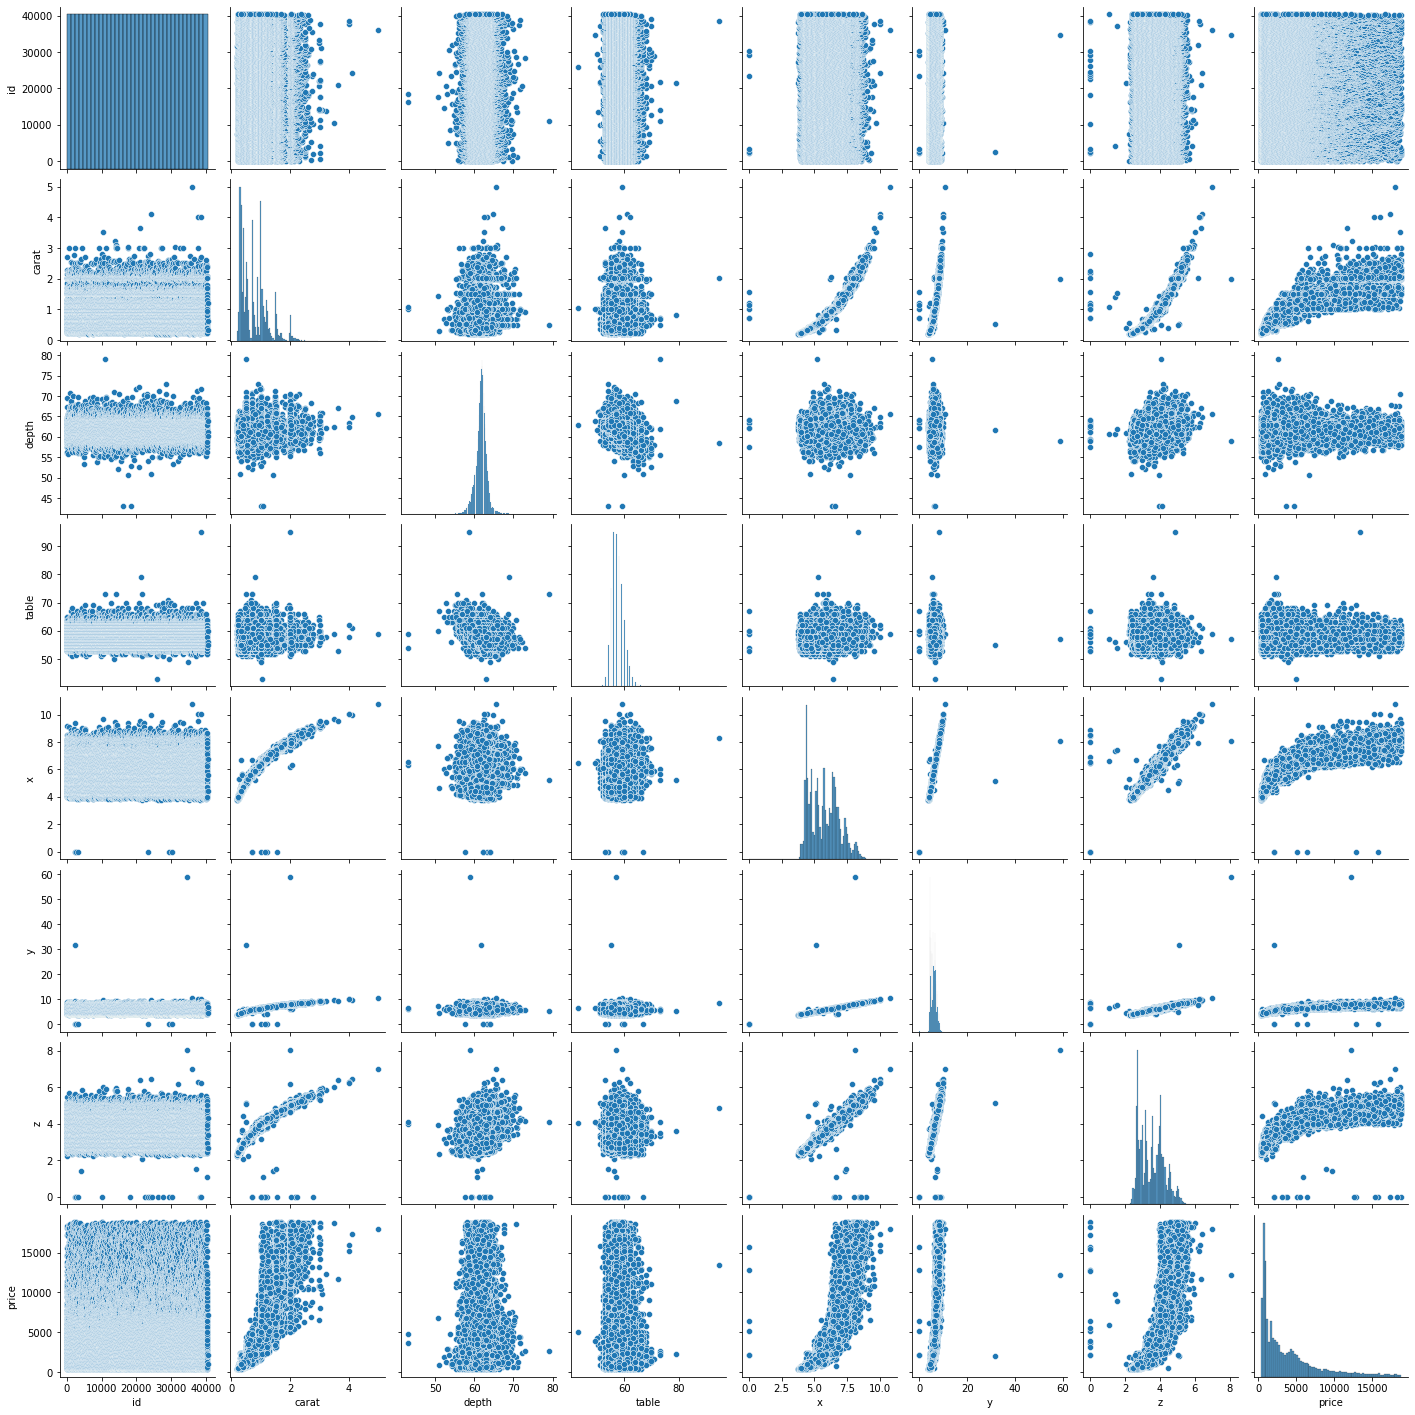

In [9]:
sns.pairplot(t_data)

<AxesSubplot:>

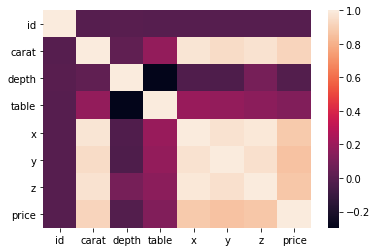

In [28]:
sns.heatmap(t_data.corr())

In [63]:
((t_numericals.corr()>0.95) & (t_numericals.corr()<1))==True

,carat,depth,table,x,y,z,price
carat,False,False,False,True,False,True,False
depth,False,False,False,False,False,False,False
table,False,False,False,False,False,False,False
x,True,False,False,False,True,True,False
y,False,False,False,True,False,True,False
z,True,False,False,True,True,False,False
price,False,False,False,False,False,False,False


In [38]:
t_numericals.corr().loc['x']

carat    0.975538
depth   -0.026495
table    0.197330
x        1.000000
y        0.967690
z        0.985338
price    0.884862
Name: x, dtype: float64

In [49]:
t_dummies_col= t_dummies.drop(columns='x')
p_dummies_col= p_dummies.drop(columns='x')

## datasets_combinations:

In [56]:
t_dummies
t_dummies_col
p_dummies
p_dummies_col;

In [61]:
# t_data
t_dummies.to_csv('data/t_dummame adds a couple of extra steps.

from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["body_style"]])ies')
t_dummies_col.to_csv('data/t_dummies_col')

# p_data
p_dummies.to_csv('data/p_dummies')
p_dummies_col.to_csv('data/p_dummies_col')